Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
                                      Release    Opening  Total Gross  \
0                           Avengers: Endgame  357115007    858373000   
1                     Spider-Man: No Way Home  260138569    804793477   
2                      Avengers: Infinity War  257698183    678815482   
3  Star Wars: Episode VII - The Force Awakens  247966675    936662225   
4     Star Wars: Episode VIII - The Last Jedi  220009584    620181382   

   % of Total  Theaters  Average        Date  \
0        41.6      4662    76601  26-04-2019   
1        32.3      4336    59995  17-12-2021   
2        38.0      4474    57599  27-04-2018   
3        26.5      4134    59982  18-12-2015   
4        35.5      4232    51987  15-12-2017   

                           Distributor  
0  Walt Disney Studios Motion Pictures  
1              Sony Pictures Releasing  
2  Walt Disney Stu

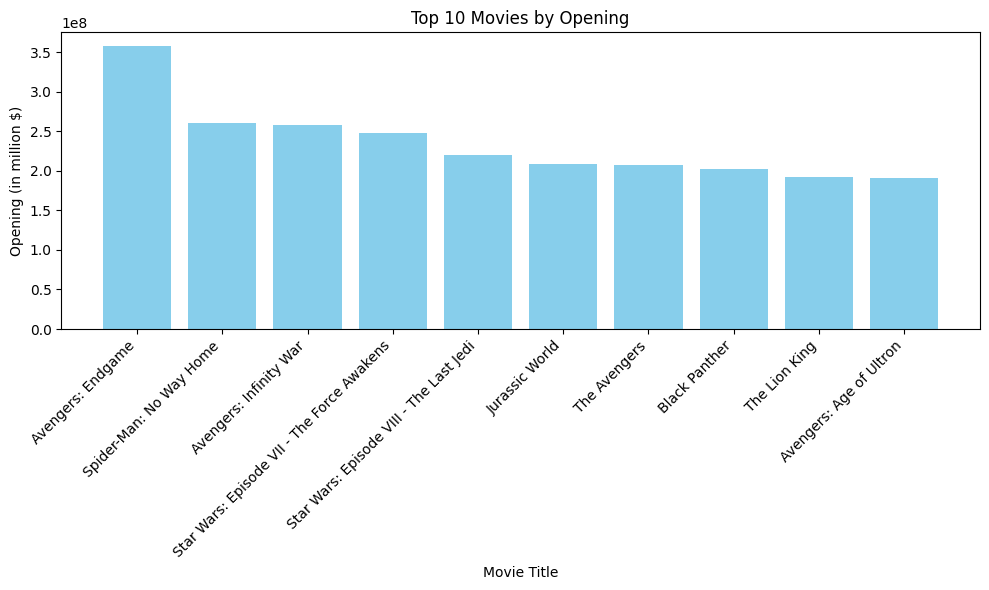

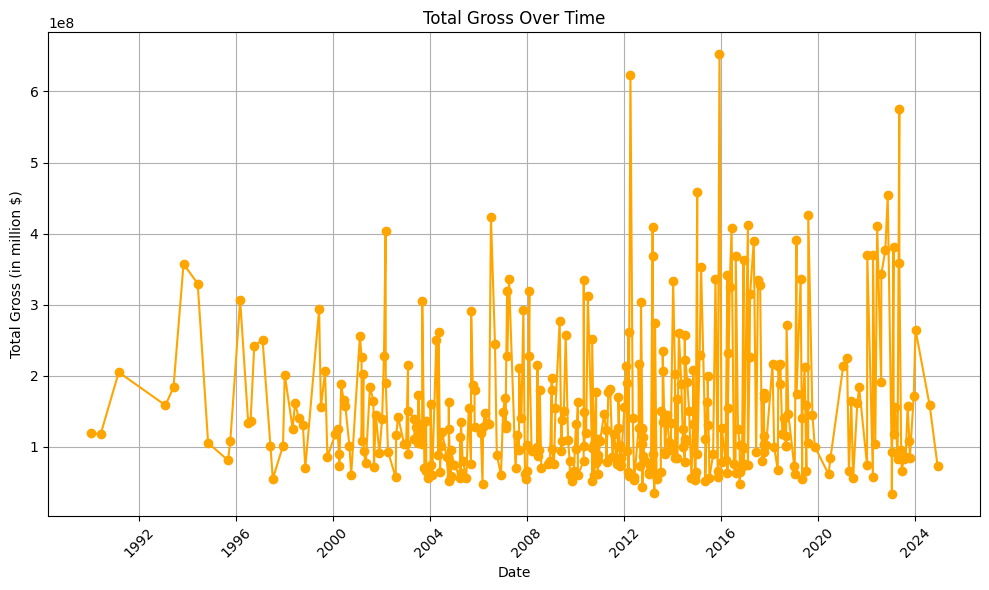

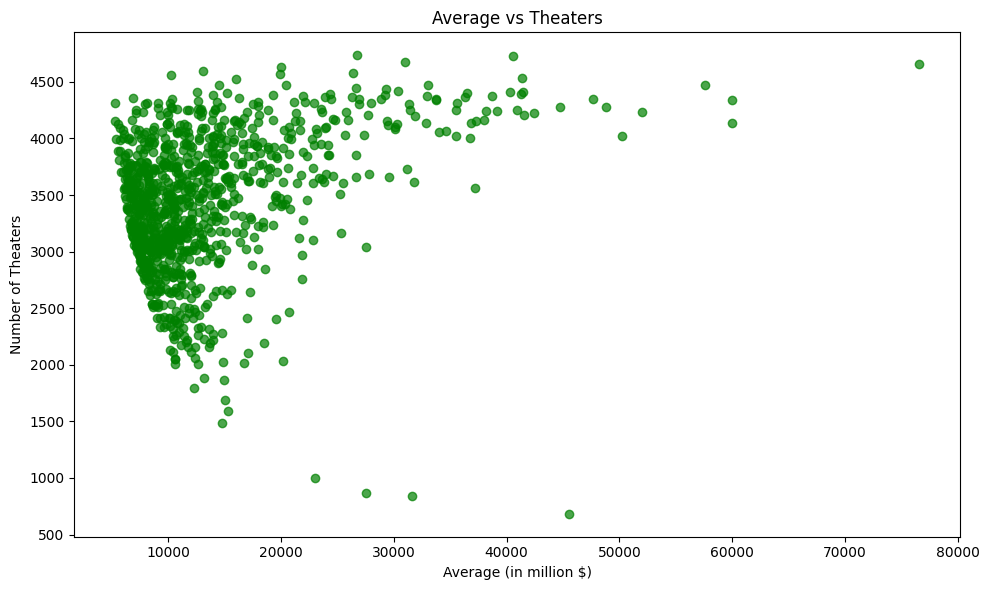

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/gdrive')

# Full path to the CSV file
csv_file = ('gdrive/My Drive/Top_Highest_Openings.csv')

# Import data into a DataFrame
df = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame
print(df.head())

# Define a function to try different date formats
def parse_date(date):
    formats = ['%m/%d/%Y', '%m-%d-%Y']
    for fmt in formats:
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return None  # If both formats fail

# Convert Date column to datetime with correct format
df['Date'] = df['Date'].apply(parse_date)

# Graph 1: Bar graph of top 10 movies by Opening
top_10_opening = df.nlargest(10, 'Opening')
plt.figure(figsize=(10, 6))
plt.bar(top_10_opening['Release'], top_10_opening['Opening'], color='skyblue')
plt.title('Top 10 Movies by Opening')
plt.xlabel('Movie Title')
plt.ylabel('Opening (in million $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Graph 2: Line graph of Total Gross over time
df_sorted_by_date = df.sort_values('Date')
plt.figure(figsize=(10, 6))
plt.plot(df_sorted_by_date['Date'], df_sorted_by_date['Total Gross'], marker='o', color='orange', linestyle='-')
plt.title('Total Gross Over Time')
plt.xlabel('Date')
plt.ylabel('Total Gross (in million $)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# Graph 3: Scatter plot of Average vs Theaters
plt.figure(figsize=(10, 6))
plt.scatter(df['Average'], df['Theaters'], color='green', alpha=0.7)
plt.title('Average vs Theaters')
plt.xlabel('Average (in million $)')
plt.ylabel('Number of Theaters')
plt.tight_layout()
plt.show()
